/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 98s 122ms/step - accuracy: 0.2884 - loss: 1.9072 - val_accuracy: 0.4450 - val_loss: 1.5483
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 140s 120ms/step - accuracy: 0.4684 - loss: 1.4651 - val_accuracy: 0.5238 - val_loss: 1.3576
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 94s 120ms/step - accuracy: 0.5212 - loss: 1.3261 - val_accuracy: 0.5923 - val_loss: 1.1187
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 93s 119ms/step - accuracy: 0.5658 - loss: 1.2203 - val_accuracy: 0.6240 - val_loss: 1.0568
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 93s 119ms/step - accuracy: 0.5895 - loss: 1.1539 - val_accuracy: 0.6453 - val_loss: 1.0032
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 93s 119ms/step - accuracy: 0.6076 - loss: 1.1087 - val_accuracy: 0.6568 - val_loss: 0.9651
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 92s 117ms/step - accuracy: 0.6221 - loss: 1.0714 - val_accuracy: 0.6550 - val_loss: 0.9886
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 94s 121ms/step - accuracy: 0.6300 - loss: 

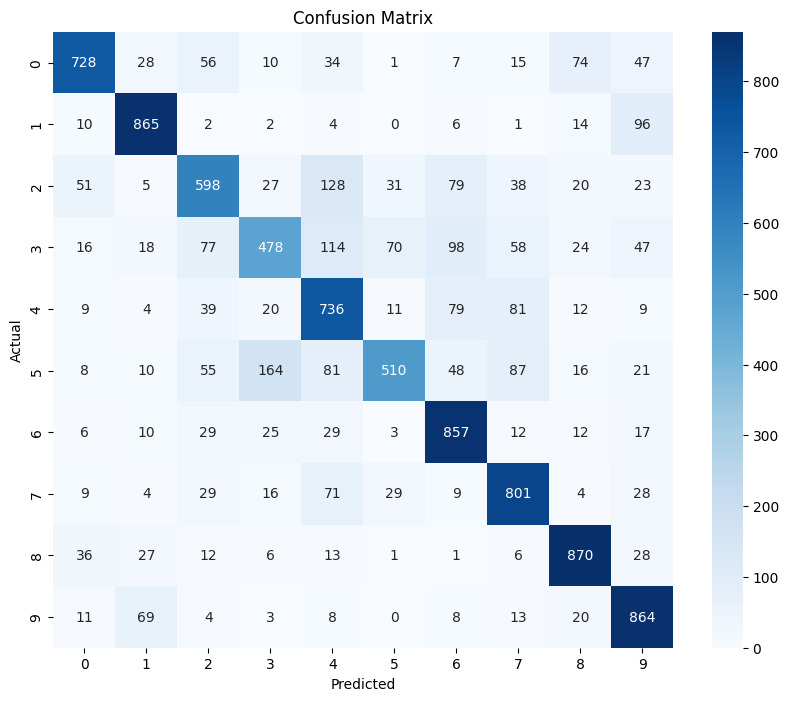

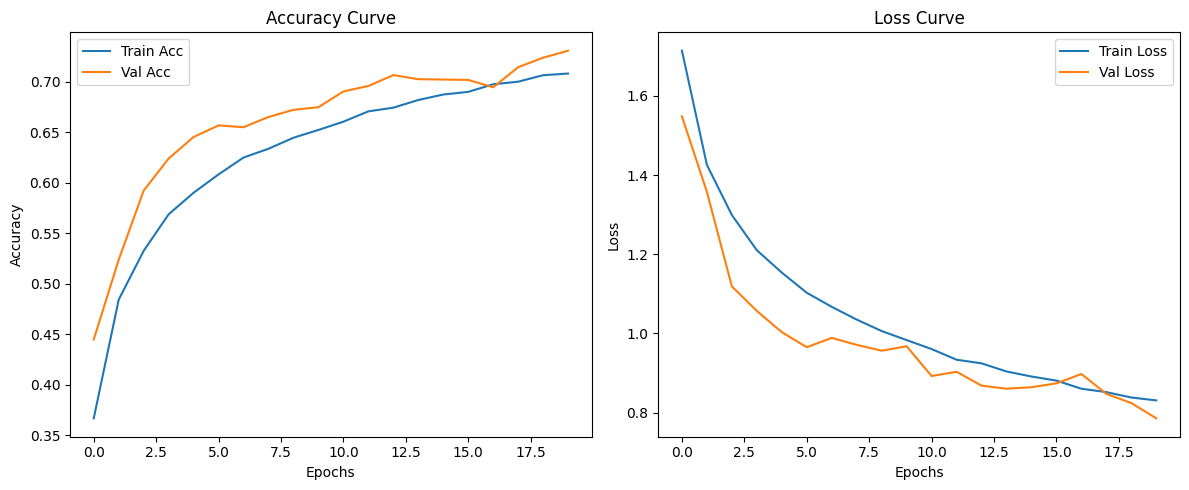

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



MLP Test Accuracy: 0.5048 vs CNN Test Accuracy: 0.7307


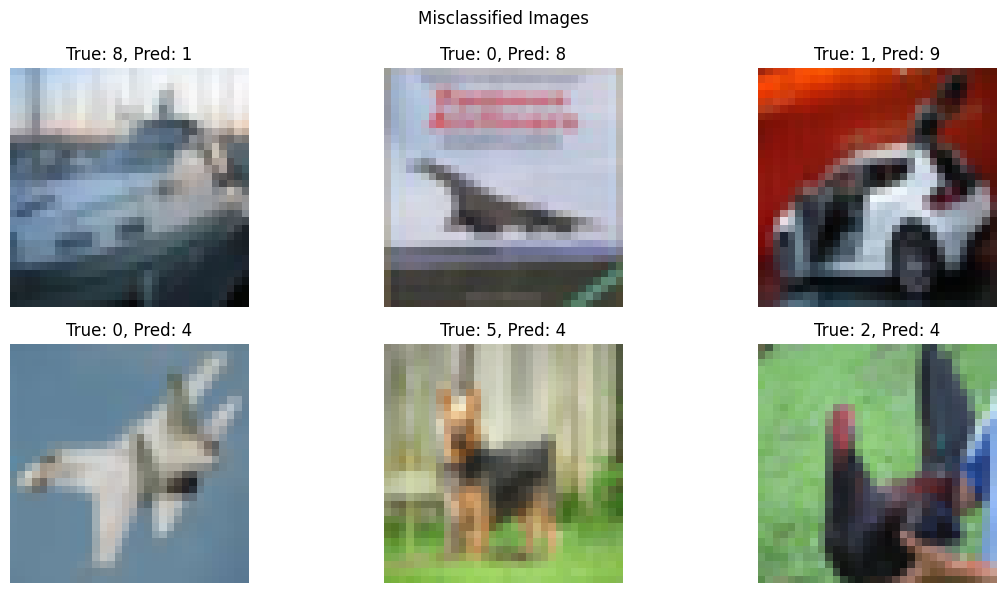

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import pandas as pd

# Data Preprocessing
# Load dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to 1D
y_train = y_train.flatten()
y_test = y_test.flatten()

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)
datagen.fit(x_train)

# CNN Model Implementation
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=20,
                    validation_data=(x_test, y_test))

# Model Performance
# Evaluate model
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTraining Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# Classification report
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot Accuracy and Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Comparison with MLP
mlp = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

mlp.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

mlp.fit(x_train, y_train, epochs=20, batch_size=64,
        validation_data=(x_test, y_test), verbose=0)

mlp_loss, mlp_acc = mlp.evaluate(x_test, y_test, verbose=0)
print(f"\nMLP Test Accuracy: {mlp_acc:.4f} vs CNN Test Accuracy: {test_acc:.4f}")

# Error Analysis
misclassified_indices = np.where(y_pred_classes != y_test)[0]
plt.figure(figsize=(12, 6))
for i, idx in enumerate(misclassified_indices[:6]):
    plt.subplot(2, 3, i+1)
    plt.imshow(x_test[idx])
    plt.title(f"True: {y_test[idx]}, Pred: {y_pred_classes[idx]}")
    plt.axis('off')
plt.suptitle("Misclassified Images")
plt.tight_layout()
plt.show()